In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Opioid Overdose Death Rate Analysis

In [2]:
# reading in 2020 opioid overdose death rate dataset
death_df = pd.read_csv("data/OpioidDeaths_2020.txt", sep="\t")

# dropping unnecessary columns
death_df = death_df.drop(columns="Notes")

# showing rows and columns of dataset
death_df.shape

(989, 5)

In [3]:
# showing null values in dataset
death_df.isna().sum()

County         70
County Code    70
Deaths         69
Population     69
Crude Rate     69
dtype: int64

In [4]:
# drop rows with null values
death_df = death_df.dropna()

# showing rows and columns of dataset after dropping null values
death_df.shape

(919, 5)

In [5]:
# showing how many death rates are unreliable
death_df[death_df['Crude Rate']=='Unreliable'].shape

(330, 5)

In [6]:
# dropping rows with unreliable death rates
death_df = death_df[death_df['Crude Rate'] != 'Unreliable']

# converting death rate column to float
death_df['Crude Rate'] = death_df['Crude Rate'].astype(float)

# showing counties with highhest death rates
death_df.sort_values(by='Crude Rate', ascending=False).head(15)

,County,County Code,Deaths,Population,Crude Rate
878,"McDowell County, WV",54047.0,27.0,16916.0,159.6
877,"Logan County, WV",54045.0,44.0,31688.0,138.9
336,"Baltimore city, MD",24510.0,777.0,586131.0,132.6
621,"Scioto County, OH",39145.0,95.0,74347.0,127.8
868,"Cabell County, WV",54011.0,112.0,91589.0,122.3
888,"Raleigh County, WV",54081.0,86.0,72920.0,117.9
890,"Wayne County, WV",54099.0,46.0,39054.0,117.8
840,"Petersburg city, VA",51730.0,33.0,30446.0,108.4
727,"Cheatham County, TN",47021.0,39.0,41101.0,94.9
411,"St. Louis city, MO",29510.0,270.0,297645.0,90.7


In [7]:
# showing counties with highest number of opioid deaths
death_df.sort_values(by='Deaths', ascending=False).head(15)

,County,County Code,Deaths,Population,Crude Rate
175,"Cook County, IL",17031.0,1662.0,5108284.0,32.5
40,"Los Angeles County, CA",6037.0,1342.0,9943046.0,13.5
16,"Maricopa County, AZ",4013.0,1255.0,4579081.0,27.4
683,"Philadelphia County, PA",42101.0,913.0,1578487.0,57.8
336,"Baltimore city, MD",24510.0,777.0,586131.0,132.6
589,"Franklin County, OH",39049.0,747.0,1324624.0,56.4
374,"Wayne County, MI",26163.0,710.0,1740623.0,40.8
648,"Allegheny County, PA",42003.0,569.0,1211358.0,47.0
95,"Broward County, FL",12011.0,555.0,1958105.0,28.3
51,"San Diego County, CA",6073.0,535.0,3332427.0,16.1


In [8]:
# reading in SDOH dataset (2020)
sdoh_df = pd.read_excel("./data/SDOH_2020_COUNTY_1_0.xlsx", sheet_name="Data")

### Rural Urban Continuum Code (RUCC) Analysis

In [9]:
# creating dataframe with only county and RUCC columns
rucc_df = sdoh_df[['COUNTYFIPS', 'AHRF_USDA_RUCC_2013']]

# converting FIPS code to float for merging purposes
rucc_df.loc[:, 'COUNTYFIPS'] = rucc_df['COUNTYFIPS'].astype(float)

# dropping columns with null values
rucc_df = rucc_df.dropna()

# RUCC codes 4-9 are typically considered rural
# labeling counties as rural or urban
rucc_df['Rural'] = rucc_df['AHRF_USDA_RUCC_2013'].apply(lambda x: 'Rural' if x >= 4 else 'Urban')
rucc_df

,COUNTYFIPS,AHRF_USDA_RUCC_2013,Rural
0,1001,2.0,Urban
1,1003,3.0,Urban
2,1005,6.0,Rural
3,1007,1.0,Urban
4,1009,1.0,Urban
...,...,...,...
3221,72145,1.0,Urban
3222,72147,7.0,Rural
3223,72149,2.0,Urban
3224,72151,1.0,Urban


Text(0, 0.5, 'Opioid Death Rate (per 100,000)')

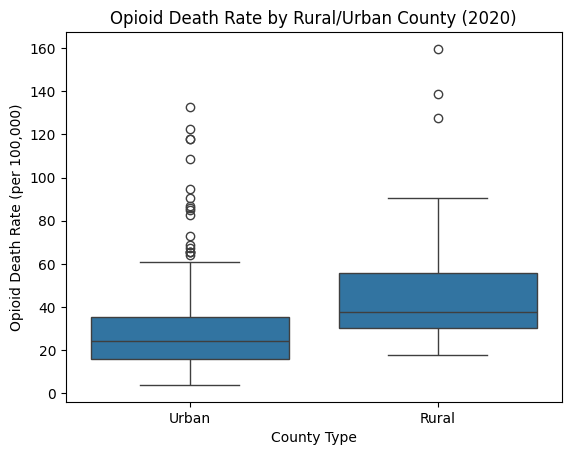

In [10]:
# creating merged df with death and RUCC data
rucc_death_df = death_df.merge(rucc_df, left_on='County Code', right_on='COUNTYFIPS', how='left')

# creating boxplot of death rates by rural/urban county
sns.boxplot(x="Rural", y="Crude Rate", data=rucc_death_df)
plt.title("Opioid Death Rate by Rural/Urban County (2020)")
plt.xlabel("County Type")
plt.ylabel("Opioid Death Rate (per 100,000)")

In [11]:
# descriptive statistics for opioid death rate by rural/urban county
rucc_death_df.groupby('Rural')['Crude Rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Rural,,,,,,,,
Rural,63.0,46.776190,27.682105,17.8,30.5,37.7,55.55,159.6
Urban,526.0,27.930418,17.512097,3.9,16.1,24.1,35.25,132.6


### SDOH: Substance Abuse Facilities Analysis

In [12]:
# creating df with only geographic and rate of substance abuse facilities columns
mental_health_df = sdoh_df[['COUNTYFIPS', 'STATE', 'COUNTY',
                            'AMFAR_MEDSAFAC_RATE']]
mental_health_df.sample(5)

,COUNTYFIPS,STATE,COUNTY,AMFAR_MEDSAFAC_RATE
848,19115,Iowa,Louisa County,0.0000
952,20125,Kansas,Montgomery County,0.0635
661,17129,Illinois,Menard County,0.0000
543,13313,Georgia,Whitfield County,0.0096
690,17187,Illinois,Warren County,0.0599


In [13]:
# showing null values in dataset
mental_health_df.isnull().sum()

COUNTYFIPS             0
STATE                  0
COUNTY                 0
AMFAR_MEDSAFAC_RATE    9
dtype: int64

In [14]:
# dropping rows with null values
mental_health_df = mental_health_df.dropna(subset=['AMFAR_MEDSAFAC_RATE'])

# converting FIPS code to float for merging purposes
mental_health_df.loc[:,'COUNTYFIPS'] = mental_health_df.COUNTYFIPS.astype(float)

In [15]:
# merging overdose death and substance abuse facility rate dataframes
death_mental_df = death_df.merge(mental_health_df, left_on='County Code', right_on='COUNTYFIPS', how='inner')
death_mental_df.sample(5)

,County,County Code,Deaths,Population,Crude Rate,COUNTYFIPS,STATE,COUNTY,AMFAR_MEDSAFAC_RATE
331,"Alamance County, NC",37001.0,34.0,171346.0,19.8,37001,North Carolina,Alamance County,0.0175
124,"Honolulu County, HI",15003.0,46.0,963826.0,4.8,15003,Hawaii,Honolulu County,0.0394
217,"Berkshire County, MA",25003.0,56.0,124571.0,45.0,25003,Massachusetts,Berkshire County,0.1204
462,"Greenville County, SC",45045.0,144.0,532486.0,27.0,45045,South Carolina,Greenville County,0.0113
353,"Moore County, NC",37125.0,23.0,103352.0,22.3,37125,North Carolina,Moore County,0.0871


Text(0, 0.5, 'Opioid Overdose Death Rate per 100k People')

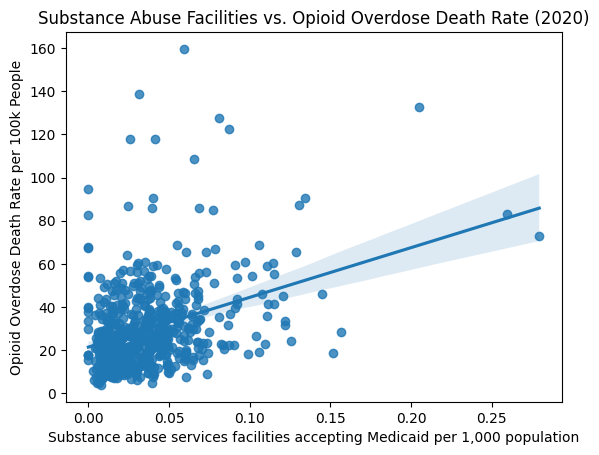

In [16]:
# creating regression plot of substance abuse facilities vs. opioid overdose death rate
sns.regplot(x='AMFAR_MEDSAFAC_RATE', y='Crude Rate', data=death_mental_df)
plt.title('Substance Abuse Facilities vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Substance abuse services facilities accepting Medicaid per 1,000 population')
plt.ylabel('Opioid Overdose Death Rate per 100k People')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


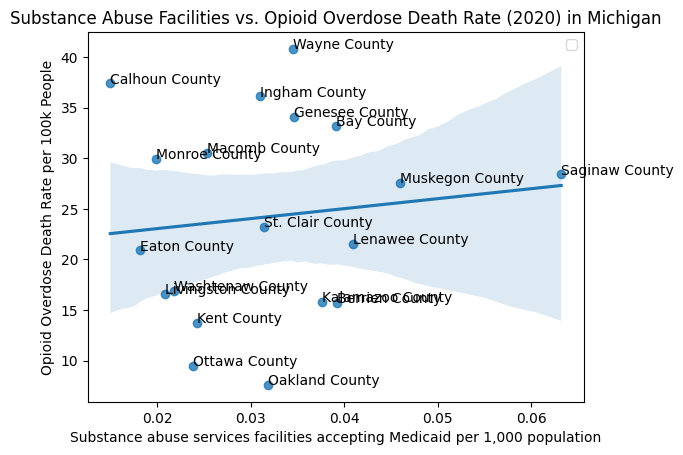

In [17]:
# creating regression plot of substance abuse facilities vs. opioid overdose death rate in Michigan
michigan_df = death_mental_df[death_mental_df.STATE == 'Michigan']

sns.regplot(x='AMFAR_MEDSAFAC_RATE', y='Crude Rate', data=michigan_df)

# plotting county names on graph
for i in range(len(michigan_df)):
    plt.text(michigan_df['AMFAR_MEDSAFAC_RATE'].iloc[i], michigan_df['Crude Rate'].iloc[i], michigan_df['COUNTY'].iloc[i])

plt.title('Substance Abuse Facilities vs. Opioid Overdose Death Rate (2020) in Michigan')
plt.xlabel('Substance abuse services facilities accepting Medicaid per 1,000 population')
plt.ylabel('Opioid Overdose Death Rate per 100k People')
plt.legend()


### SDOH: Poverty Analysis

In [18]:
# creating df with only geographic and percent of population in poverty columns
pov_df = sdoh_df[['COUNTYFIPS', 'STATE', 'COUNTY', 'SAIPE_PCT_POV']].copy()
pov_df.sample(5)

,COUNTYFIPS,STATE,COUNTY,SAIPE_PCT_POV
1411,28017,Mississippi,Chickasaw County,24.8
1782,34013,New Jersey,Essex County,14.3
2104,39119,Ohio,Muskingum County,15.0
1410,28015,Mississippi,Carroll County,15.6
2761,48473,Texas,Waller County,12.6


In [19]:
# dropping rows with null values
pov_df = pov_df.dropna(subset=['SAIPE_PCT_POV'])

# converting FIPS code to float for merging purposes
pov_df.loc[:, 'COUNTYFIPS'] = pov_df.COUNTYFIPS.astype(float)

In [20]:
# descriptive statistics for percent of population in poverty
pov_df.SAIPE_PCT_POV.describe()

count    3142.000000
mean       13.735360
std         5.422366
min         3.000000
25%         9.900000
50%        12.800000
75%        16.600000
max        43.900000
Name: SAIPE_PCT_POV, dtype: float64

In [21]:
# categorizing counties by percent of population in poverty
# low is less than or equal to 9.9% (25th percentile)
# high is greater than or equal to 16.6% (75th percentile)
pov_df['pov_cat'] = np.where(pov_df['SAIPE_PCT_POV'] <= 9.9, 'low', np.where(pov_df['SAIPE_PCT_POV'] >= 16.6, 'high', 'medium'))

In [22]:
# creating merged df with death and poverty data
death_pov_df = death_df.merge(pov_df, left_on='County Code', right_on='COUNTYFIPS', how='inner')
death_pov_df.sample(5)

,County,County Code,Deaths,Population,Crude Rate,COUNTYFIPS,STATE,COUNTY,SAIPE_PCT_POV,pov_cat
3,"Mobile County, AL",1097.0,46.0,412716.0,11.1,1097,Alabama,Mobile County,17.6,high
540,"Petersburg city, VA",51730.0,33.0,30446.0,108.4,51730,Virginia,Petersburg city,20.8,high
527,"Hanover County, VA",51085.0,24.0,108262.0,22.2,51085,Virginia,Hanover County,5.0,low
410,"Clackamas County, OR",41005.0,37.0,421596.0,8.8,41005,Oregon,Clackamas County,6.8,low
431,"Indiana County, PA",42063.0,28.0,83664.0,33.5,42063,Pennsylvania,Indiana County,13.4,medium


Text(0, 0.5, 'Opioid Overdose Death Rate (per 100k People)')

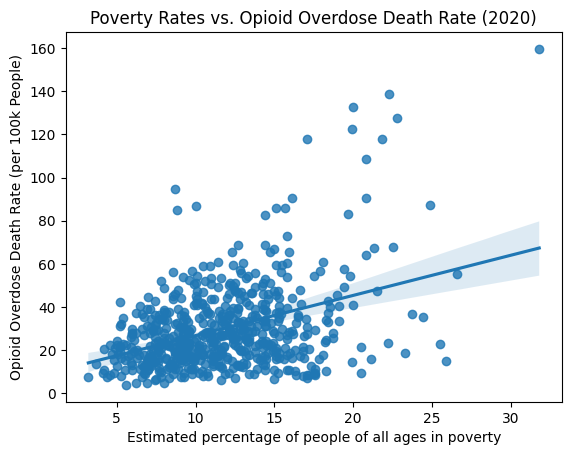

In [23]:
# creating regression plot of poverty rates vs. opioid overdose death rate
sns.regplot(x='SAIPE_PCT_POV', y='Crude Rate', data=death_pov_df)
plt.title('Poverty Rates vs. Opioid Overdose Death Rate (2020)')
plt.xlabel('Estimated percentage of people of all ages in poverty')
plt.ylabel('Opioid Overdose Death Rate (per 100k People)')

Text(0, 0.5, 'Opioid Overdose Death Rate (per 100,000)')

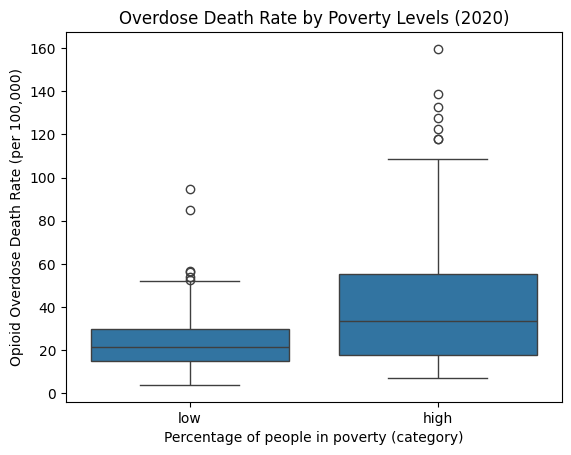

In [24]:
# filtering the data for low and high pov_cat (removing medium)
filtered_data = death_pov_df[death_pov_df['pov_cat'].isin(['low', 'high'])]

# creating boxplot of death rates by poverty levels
sns.boxplot(x='pov_cat', y='Crude Rate', data=filtered_data)
plt.title('Overdose Death Rate by Poverty Levels (2020)')
plt.xlabel('Percentage of people in poverty (category)')
plt.ylabel('Opioid Overdose Death Rate (per 100,000)')
